[Video 7](https://www.youtube.com/watch?v=iqQgED9vV7k&list=PLeo1K3hjS3uu7CxAacxVndI4bE_o3BDtO&index=7)

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

# Importation des données
---

Depuis une api de keras

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

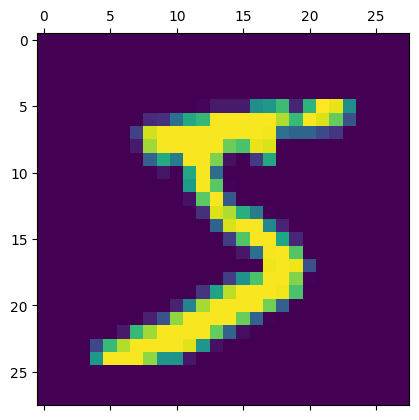

In [8]:
plt.matshow(X_train[0]) # faire apparaitre l'image grace à matplotlib

In [9]:
y_train[5]

2

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
X_train.shape # trois dimensions (nbr image, puis les deux dimensions des images)

(60000, 28, 28)

In [12]:
# Scaling values : scale frome 0 to 1
# nos valeurs sont sur 255 donc on les divises par 255 pour obtenir une valeur entre 0 et 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255
# Scaling data is a technique that improve acurracy of machine learning models

In [13]:
X_train_scaled_flattened = X_train_scaled.reshape(len(X_train_scaled), 28*28) # applatir les image : passer d'un tableau à deux dimension à un tableau à 1 dimension
X_test_scaled_flattened = X_test_scaled.reshape(len(X_test_scaled), 28*28)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [14]:
X_train_scaled_flattened.shape # deux dimensions (nbr image, image applatit)

(60000, 784)

In [15]:
X_test_scaled_flattened.shape # deux dimensions (nbr image, image applatit)

(10000, 784)

In [16]:
X_train_scaled_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Création du modèle
---

In [17]:
# Création du modèle
model = keras.Sequential([
    keras.layers.Dense(10, # couche de sortie
                      input_shape=(784,), # couche d'entrée
                      activation='sigmoid' # fonction d'activation
                      )
])

# Après, on doit compiler le modèle
model.compile(
    optimizer='adam', #
    loss='sparse_categorical_crossentropy', # categorical: 0 to 9, sparse: output in int
    metrics=['accuracy'] # the goal is to make the modèle more accurate
  )

model.fit(X_train_scaled_flattened, y_train, epochs=5) # where the training is happening. Supplying the training set
# epochs => nombre d'itération de notre modèle

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8133 - loss: 0.7253
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9116 - loss: 0.3076
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9194 - loss: 0.2918
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9232 - loss: 0.2705
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9247 - loss: 0.2683


In [18]:
model.evaluate(X_test_scaled_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9144 - loss: 0.3045


[0.2679625153541565, 0.9253000020980835]

# Sample prédictions
---

Just for fun

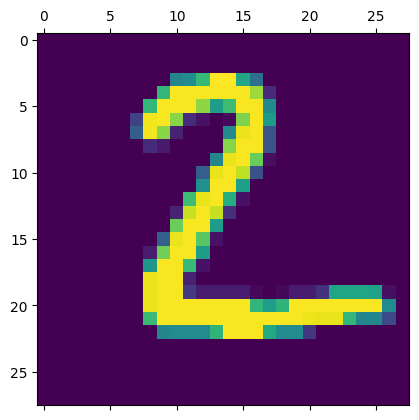

In [19]:
plt.matshow(X_test[1])

In [20]:
y_predicted = model.predict(X_test_scaled_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.2753741e-01, 1.0841627e-02, 9.9941206e-01, 4.3888241e-01,
       5.7651756e-10, 8.3786649e-01, 8.6818081e-01, 1.0421523e-12,
       1.8777503e-01, 2.3028548e-09], dtype=float32)

In [21]:
np.argmax(y_predicted[1])

2

# Confusion matrix
---

Matrice de confusion : elles permet de montrer graphiquement les performances des prédictions de notre modèle

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels) # confusion matrix
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    2,    2,    0,    4,    5,    2,    2,    0],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   7,   11,  919,   19,    8,    3,   12,   10,   40,    3],
       [   2,    0,   18,  930,    0,   17,    2,   10,   26,    5],
       [   2,    1,    7,    1,  920,    0,    8,    4,   11,   28],
       [   9,    3,    5,   41,    8,  772,   10,    5,   33,    6],
       [  13,    3,    9,    1,    7,   12,  907,    2,    4,    0],
       [   1,    7,   23,    6,    8,    1,    0,  946,    3,   33],
       [   6,    9,    6,   21,    9,   22,    8,    9,  878,    6],
       [  10,    8,    1,   11,   31,    8,    0,   23,   11,  906]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

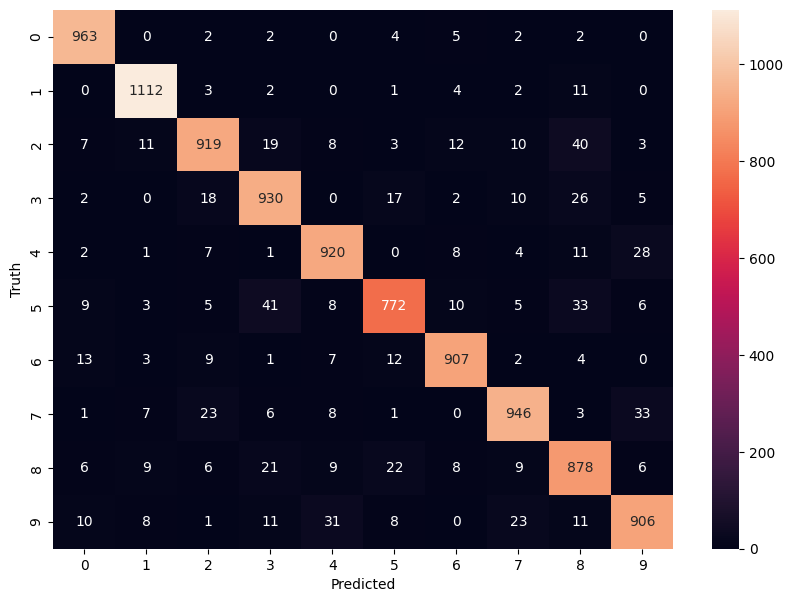

In [25]:
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layers to the model
---


In [26]:
# Ajout de couche de neurones cachée
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # input and hidden layers
    keras.layers.Dense(10, activation='sigmoid') # output layers
])

# Après, on doit compiler le modèle
model2.compile(
    optimizer='adam', #
    loss='sparse_categorical_crossentropy', # categorical: 0 to 9, sparse: output in int
    metrics=['accuracy'] # the goal is to make the modèle more accurate
  )

model2.fit(X_train_scaled_flattened, y_train, epochs=5) # where the training is happening. Supplying the training set
# epochs => nombre d'itération de notre modèle

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8748 - loss: 0.4467
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9615 - loss: 0.1329
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9735 - loss: 0.0879
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9810 - loss: 0.0648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9838 - loss: 0.0519


In [27]:
# Evalutation du model
model2.evaluate(X_test_scaled_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0840


[0.0755947083234787, 0.9765999913215637]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

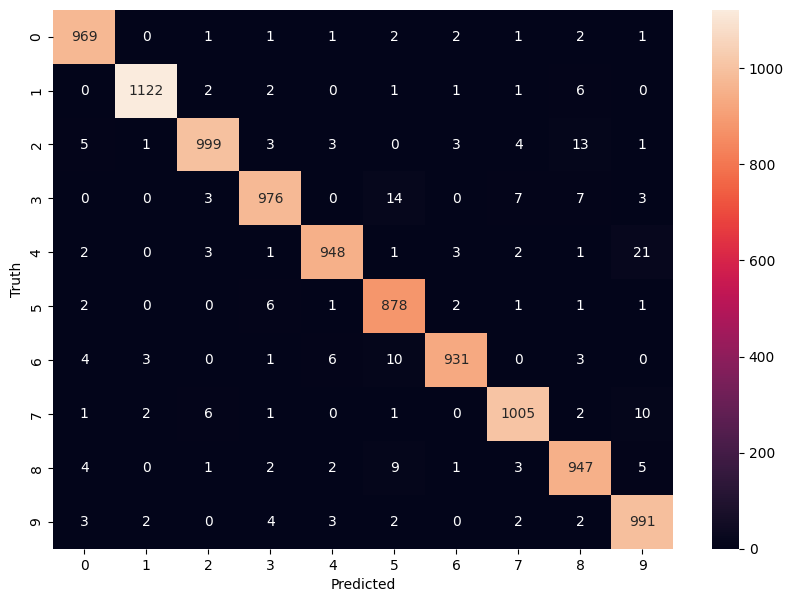

In [28]:
# Confusion matrix
y_predicted2 = model2.predict(X_test_scaled_flattened)
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2) # confusion matrix

plt.figure(figsize=(10, 7))
sn.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Utilisation de keras pour applatir les array des images

In [40]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer
    keras.layers.Dense(700, activation='relu'), # hidden layer
    keras.layers.Dense(600, activation='relu'), # hidden layer
    keras.layers.Dense(500, activation='relu'), # hidden layer
    keras.layers.Dense(400, activation='relu'), # hidden layer
    keras.layers.Dense(300, activation='relu'), # hidden layer
    keras.layers.Dense(200, activation='relu'), # hidden layer
    keras.layers.Dense(100, activation='relu'), # hidden layer
    keras.layers.Dense(50, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='sigmoid') # output layer
])

model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
  )

model3.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.8610 - loss: 0.4537
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9664 - loss: 0.1341
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 27ms/step - accuracy: 0.9752 - loss: 0.1024
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.9778 - loss: 0.0886
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9837 - loss: 0.0654
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9863 - loss: 0.0572
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 26ms/step - accuracy: 0.9888 - loss: 0.0513
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9895 - loss: 0.0448
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9898 - loss: 0.0432
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 26ms/step - accuracy: 0.9911 - loss: 0.0382


In [41]:
# Evalutation du model
model3.evaluate(X_test_scaled, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9782 - loss: 0.1369


[0.10959640890359879, 0.9818000197410583]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


Text(95.72222222222221, 0.5, 'Truth')

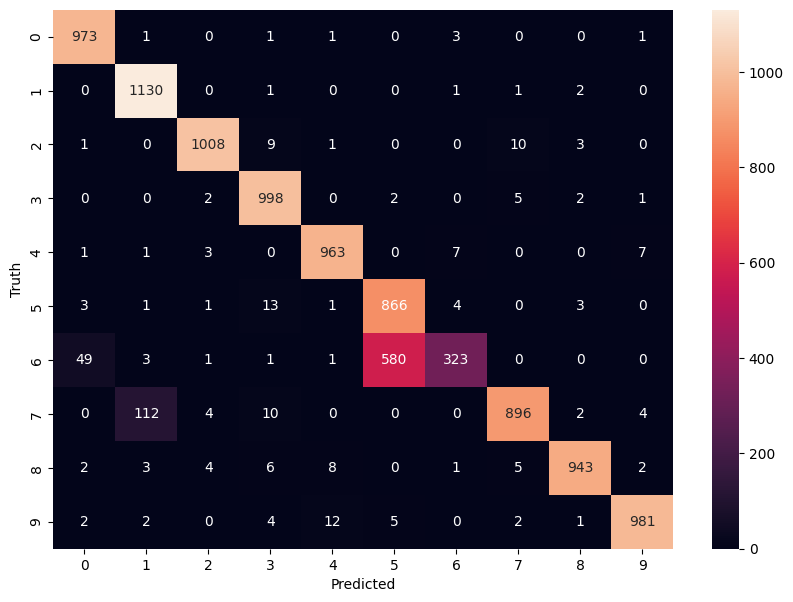

In [42]:
# Confusion matrix
y_predicted3 = model3.predict(X_test_scaled)
y_predicted_labels3 = [np.argmax(i) for i in y_predicted3]
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels3) # confusion matrix

plt.figure(figsize=(10, 7))
sn.heatmap(cm3, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')